#WEB SCRAPING & DATA PREPROCESSING(CLEANING)


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ensure directory for fine-tuning datasets exists
base_folder_path = '/content/drive/My Drive/finetuning_datasets'
os.makedirs(base_folder_path, exist_ok=True)

# Function to clean text data
def clean_text(text):
    cleaned_text = text.lower()
    cleaned_text = re.sub(r'<.*?>', '', cleaned_text)  # Remove HTML tags
    cleaned_text = re.sub(r'[^a-z0-9.,;:?!\'"() ]+', ' ', cleaned_text)  # Keep standard punctuation
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # Normalize whitespace
    return cleaned_text

# Function to scrape and clean text from a book URL
def scrape_book_content(url, word_limit):
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to retrieve the page.")
        return ""
    soup = BeautifulSoup(response.text, 'html.parser')
    book_content = soup.find_all('p')  # Adjust based on website structure
    text = ' '.join([para.get_text() for para in book_content])

    # Limit word count
    if len(text.split()) > word_limit:
        text = ' '.join(text.split()[:word_limit])

    return clean_text(text)

# Function to save cleaned text to finetuning_datasets folder
def save_text_to_file(text, filename):
    # Specify the path to save the file
    file_path = os.path.join(base_folder_path, filename)
    with open(file_path, 'w') as f:
        f.write(text)
    print(f"Saved cleaned text to {file_path}")

# URLs for genre-specific books
genre_urls = {
    "fantasy": "https://www.gutenberg.org/cache/epub/1251/pg1251-images.html",  #   fantasy book URL(le Morte d'arthur)
    "science_fiction": "https://www.gutenberg.org/cache/epub/84/pg84-images.html",  #   sci-fi book URL(frankenstein)
    "mystery": "https://www.gutenberg.org/cache/epub/2554/pg2554-images.html",  #   mystery book URL(crime and punishment)
    "romance": "https://www.gutenberg.org/cache/epub/67979/pg67979-images.html",  #  romance book URL(the blue castle)
    "horror": "https://www.gutenberg.org/cache/epub/345/pg345-images.html"  #  horror book URL(dracula)
}

# Scrape, clean, and save data for each genre
word_limit = 50000
for genre, url in genre_urls.items():
    book_text = scrape_book_content(url, word_limit)
    save_text_to_file(book_text, f'cleaned_{genre}.txt')



Mounted at /content/drive
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_fantasy.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_science_fiction.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_mystery.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_romance.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_horror.txt


#EDA OF THE CLEANED DATASETS

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Analysis for cleaned_fantasy.txt ===
Total Words: 50290
Unique Words: 4890
Total Sentences: 1841
Average Words per Sentence: 27.32
Total Characters: 258163
Total Paragraphs: 1


<ipython-input-3-185357091fd1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')


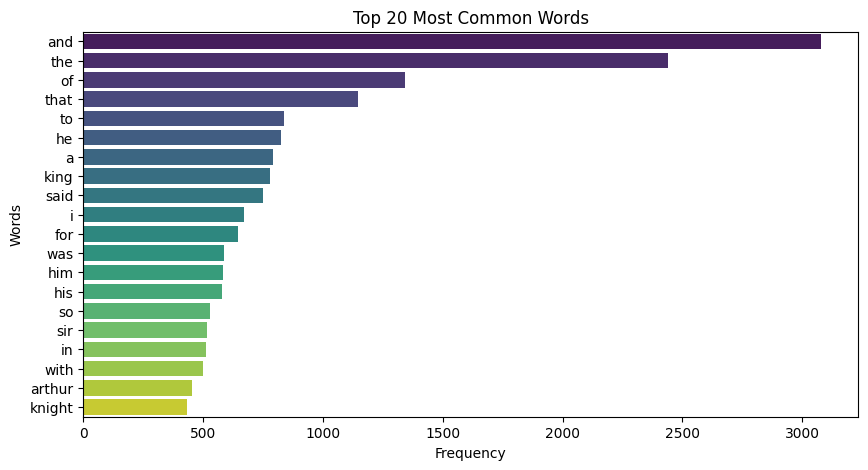

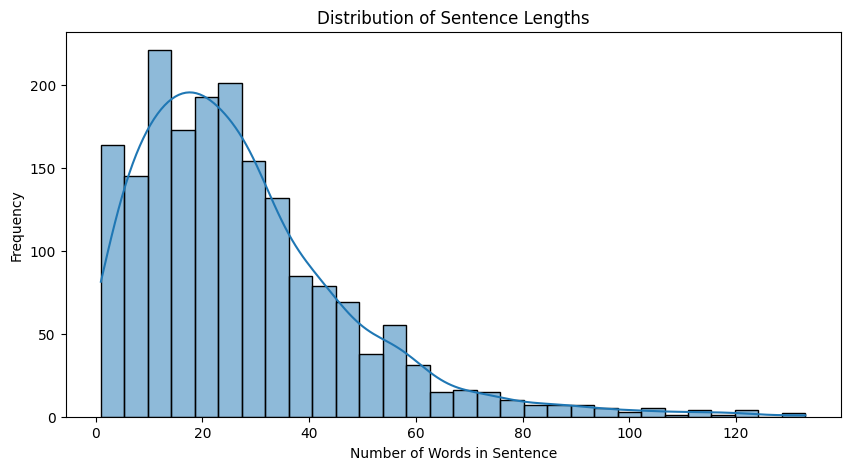

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


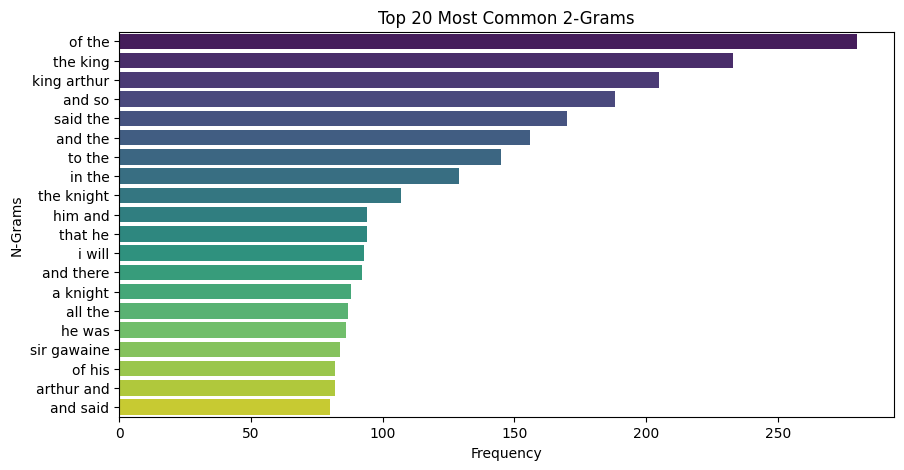

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


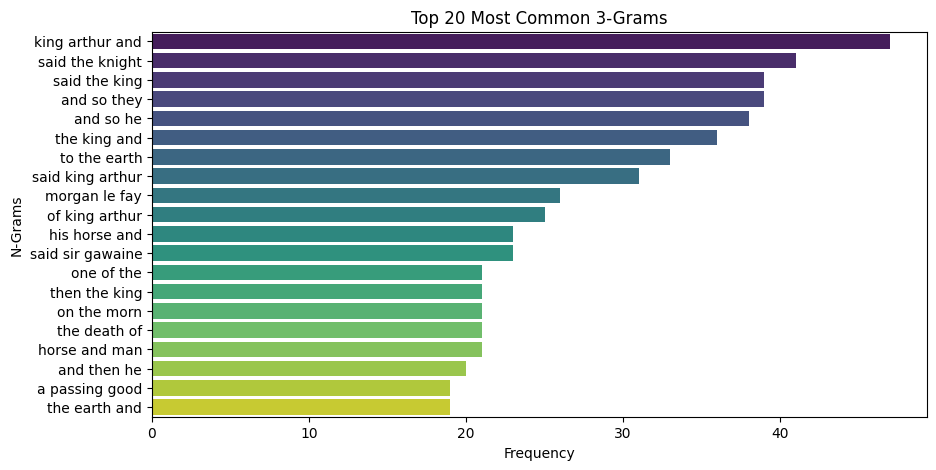

<ipython-input-3-185357091fd1>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')


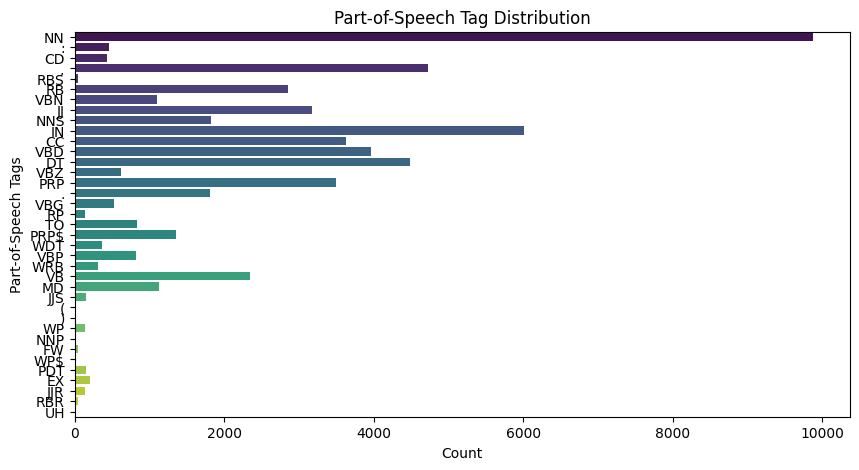

Flesch Reading Ease Score: 76.59
Flesch-Kincaid Grade Level: 9.60

=== Analysis for cleaned_science_fiction.txt ===
Total Words: 50251
Unique Words: 8590
Total Sentences: 2270
Average Words per Sentence: 22.14
Total Characters: 279671
Total Paragraphs: 1


<ipython-input-3-185357091fd1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')


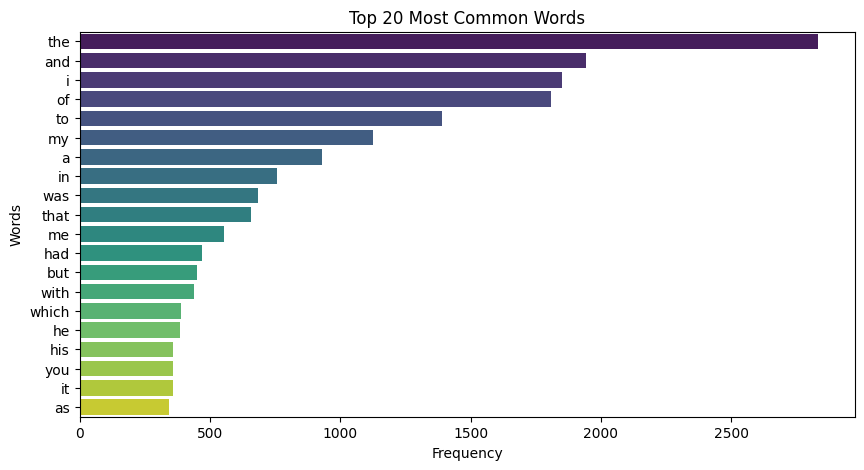

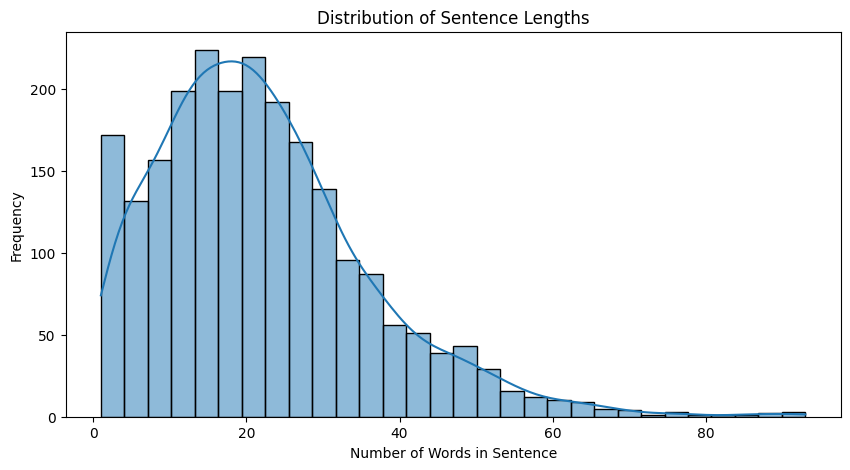

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


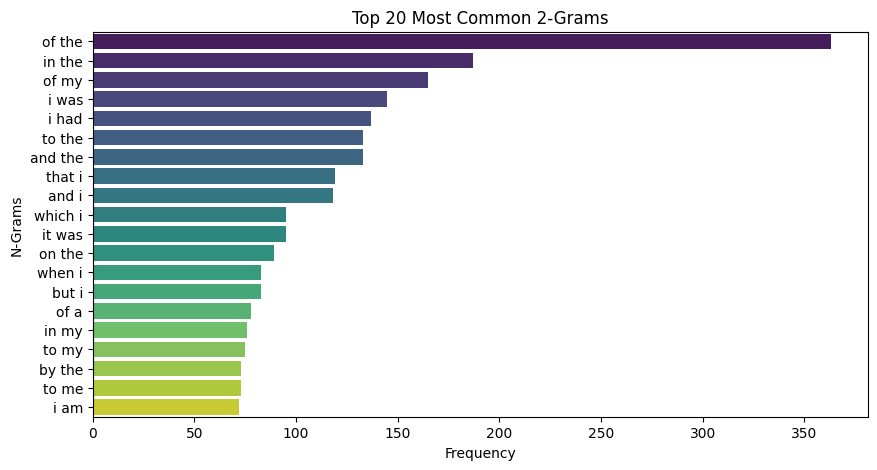

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


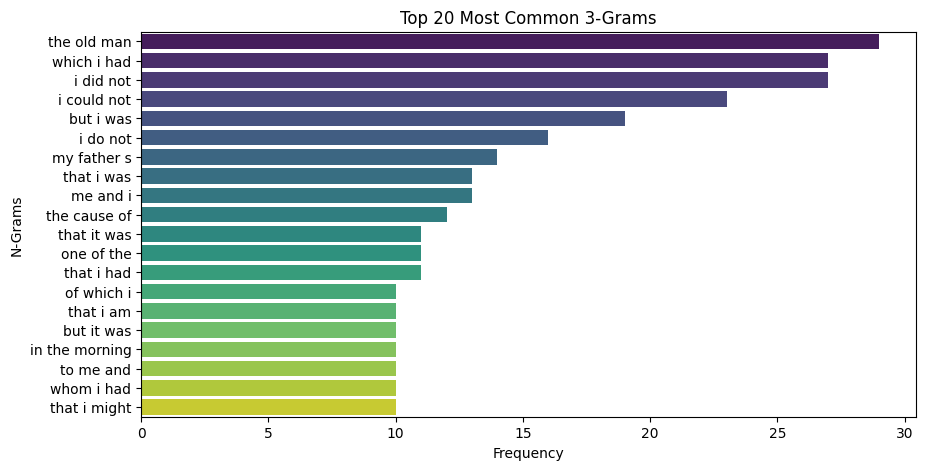

<ipython-input-3-185357091fd1>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')


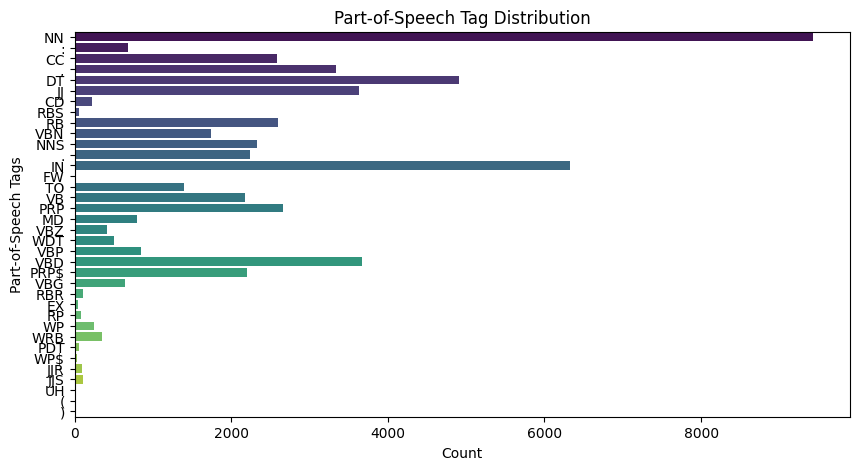

Flesch Reading Ease Score: 65.15
Flesch-Kincaid Grade Level: 9.90

=== Analysis for cleaned_mystery.txt ===
Total Words: 50937
Unique Words: 7903
Total Sentences: 3345
Average Words per Sentence: 15.23
Total Characters: 271025
Total Paragraphs: 1


<ipython-input-3-185357091fd1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')


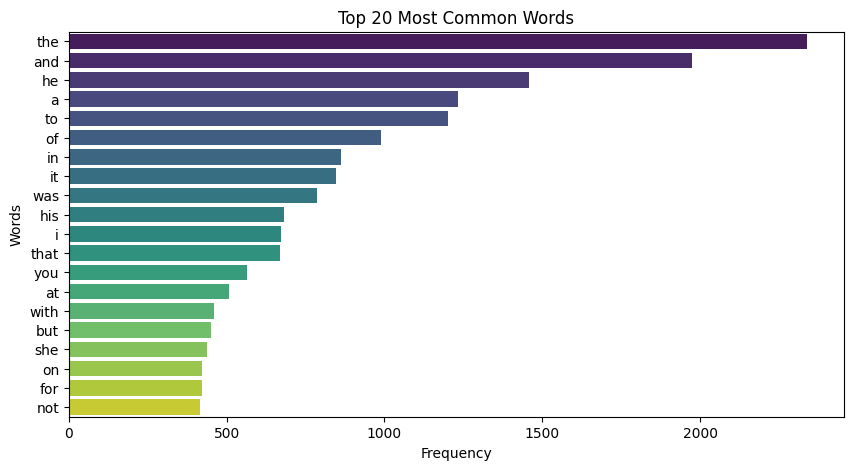

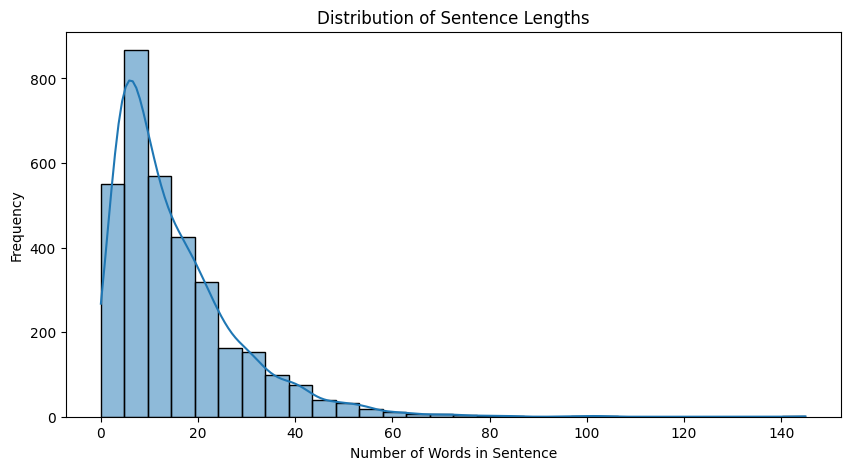

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


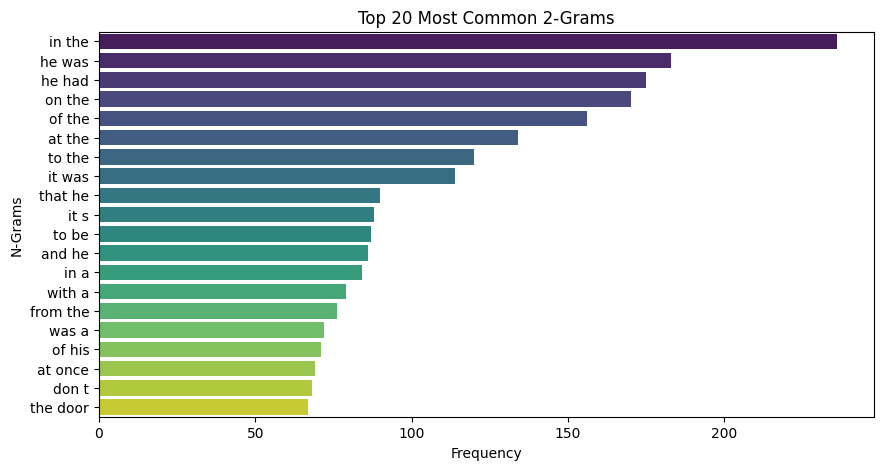

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


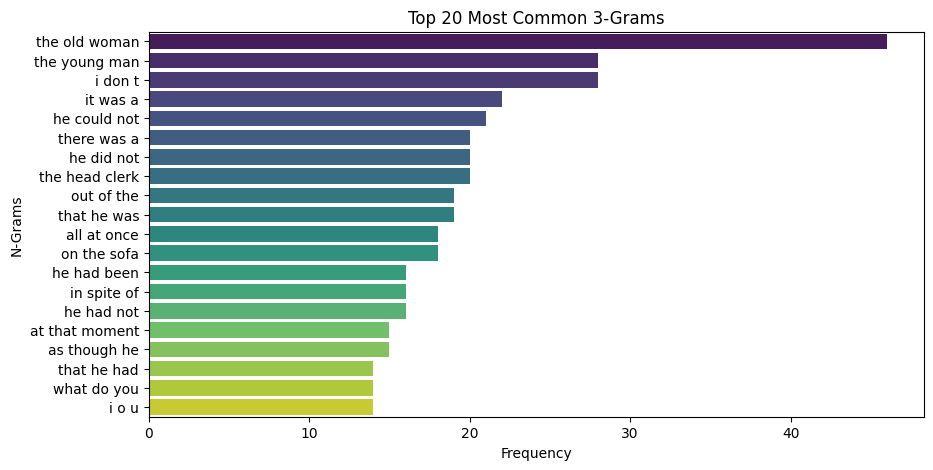

<ipython-input-3-185357091fd1>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')


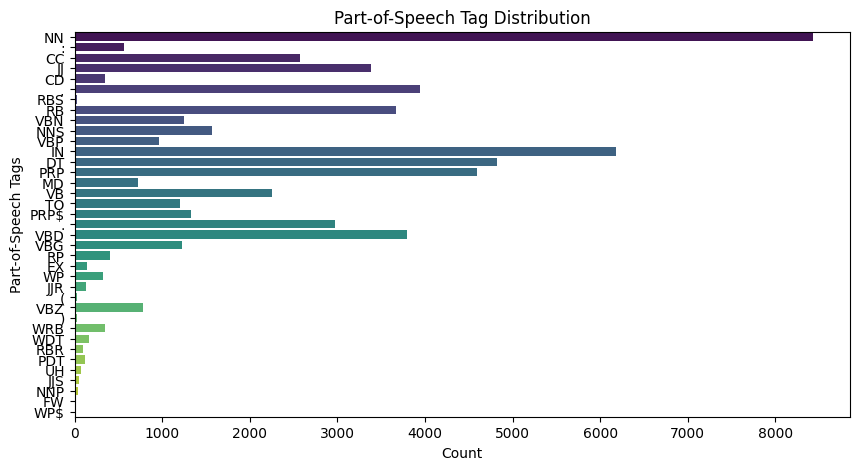

Flesch Reading Ease Score: 80.41
Flesch-Kincaid Grade Level: 6.10

=== Analysis for cleaned_romance.txt ===
Total Words: 52293
Unique Words: 8075
Total Sentences: 4442
Average Words per Sentence: 11.77
Total Characters: 281864
Total Paragraphs: 1


<ipython-input-3-185357091fd1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')


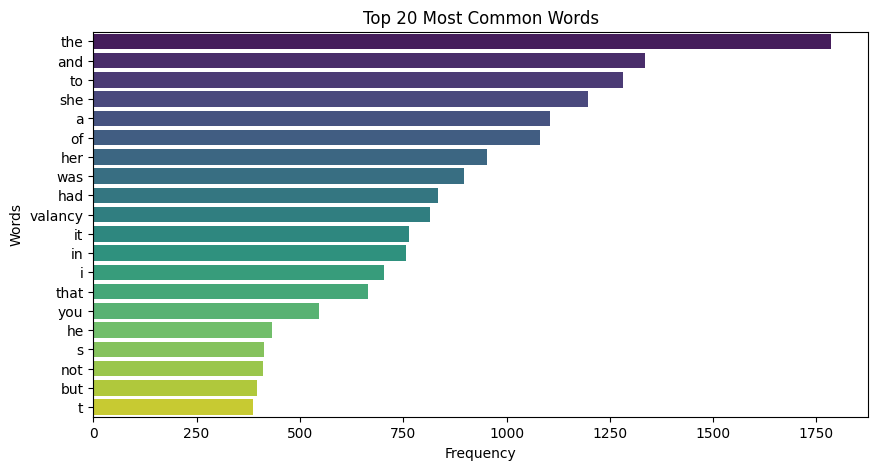

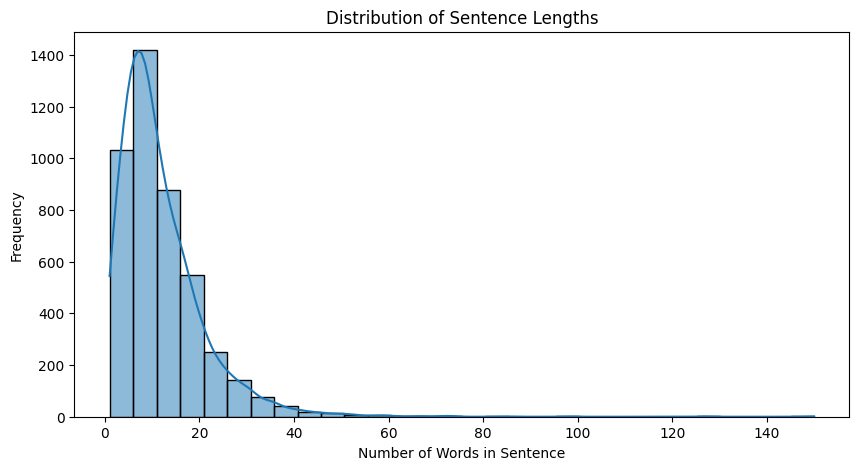

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


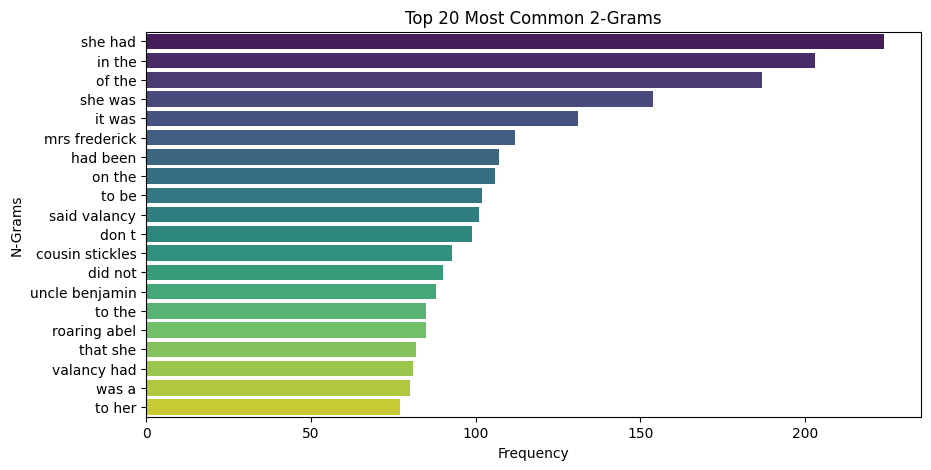

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


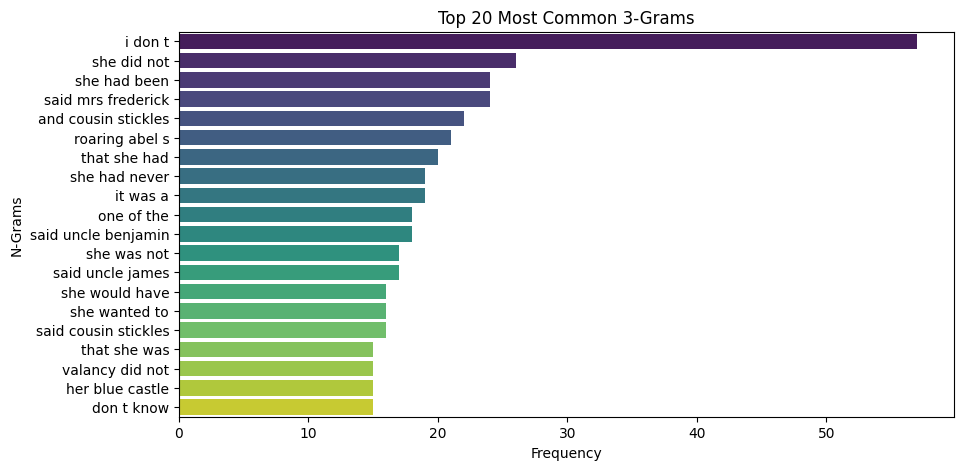

<ipython-input-3-185357091fd1>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')


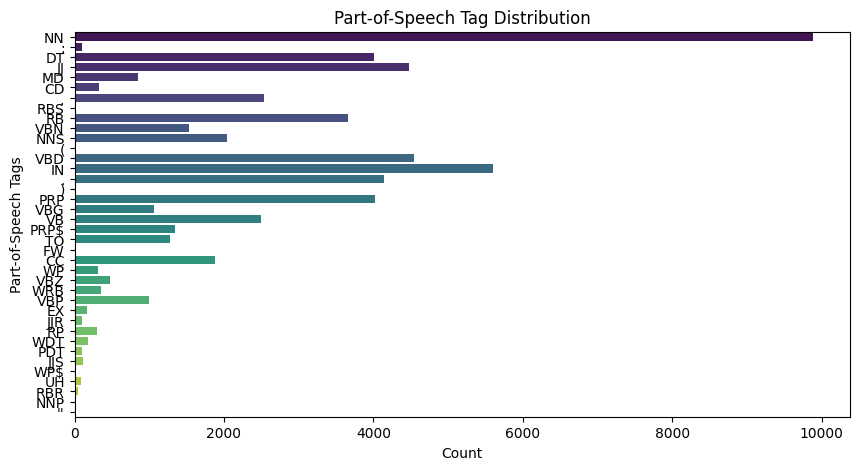

Flesch Reading Ease Score: 83.96
Flesch-Kincaid Grade Level: 4.70

=== Analysis for cleaned_horror.txt ===
Total Words: 50896
Unique Words: 7924
Total Sentences: 2723
Average Words per Sentence: 18.69
Total Characters: 259682
Total Paragraphs: 1


<ipython-input-3-185357091fd1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')


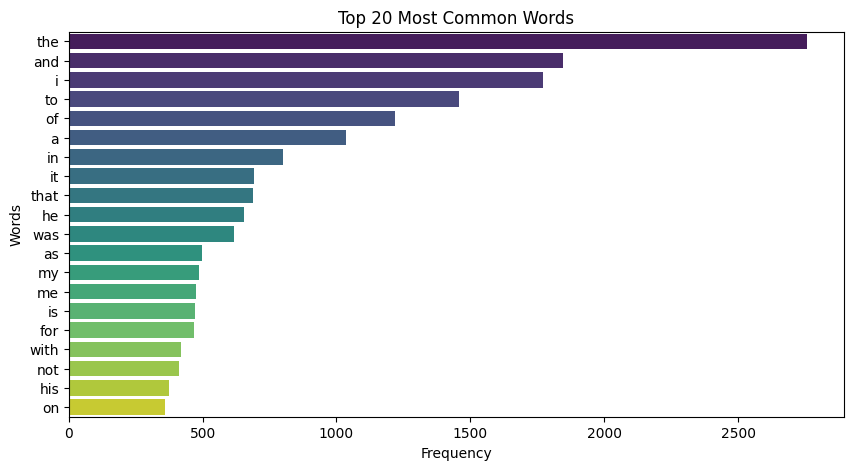

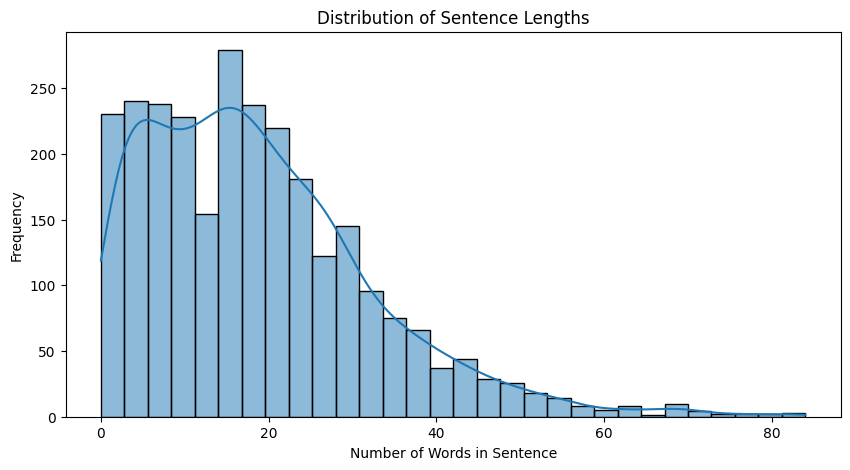

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


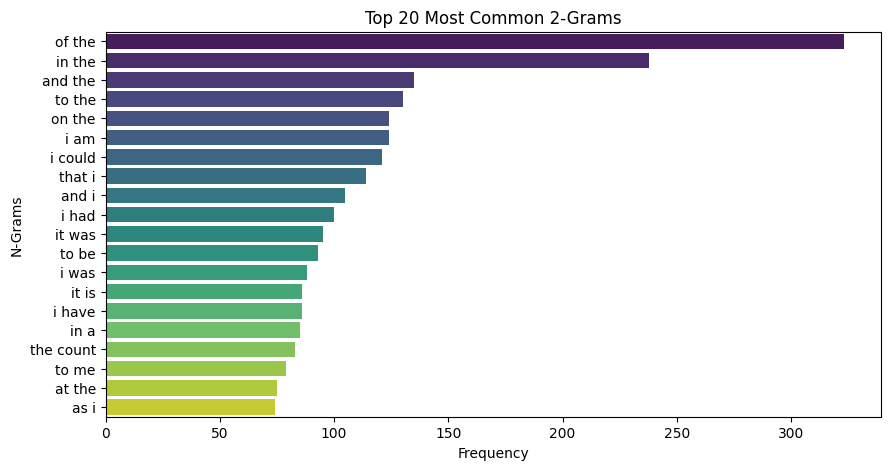

<ipython-input-3-185357091fd1>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')


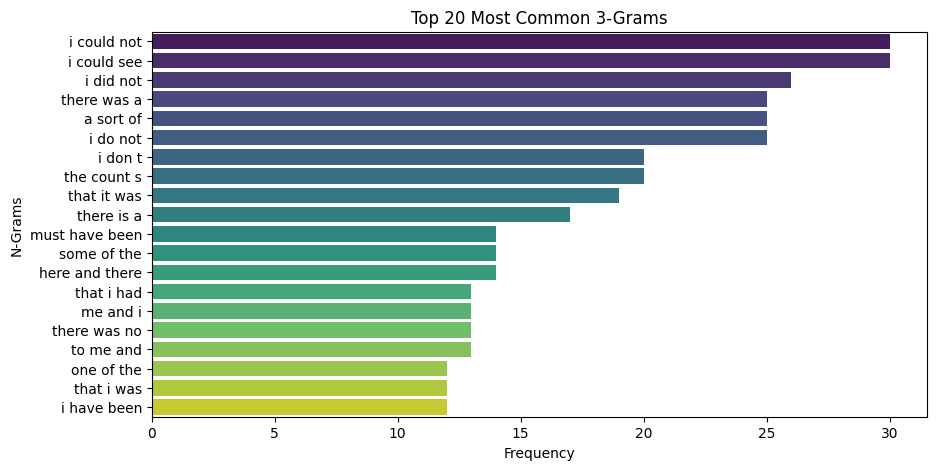

<ipython-input-3-185357091fd1>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')


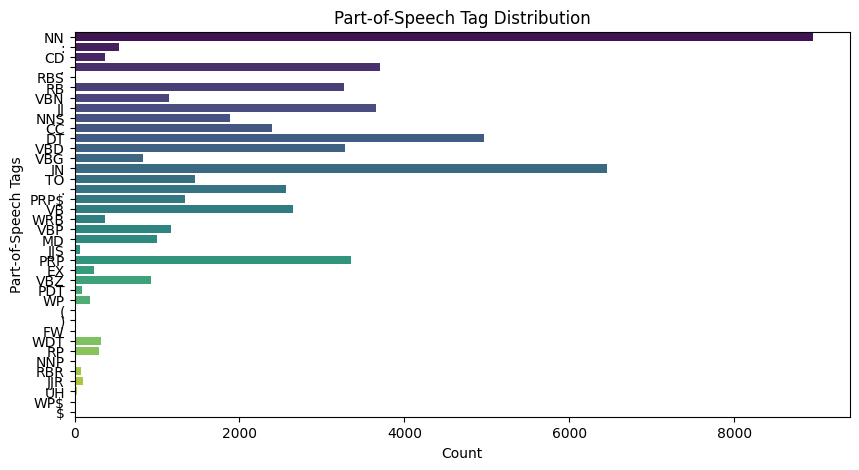

Flesch Reading Ease Score: 84.61
Flesch-Kincaid Grade Level: 6.50


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import ngrams, pos_tag
from nltk.tokenize import word_tokenize
from textstat import flesch_reading_ease, flesch_kincaid_grade
import nltk

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ensure directory for fine-tuning datasets exists
base_folder_path = '/content/drive/My Drive/finetuning_datasets'
os.makedirs(base_folder_path, exist_ok=True)

# Load the cleaned text data from the file
def load_text(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Basic Text Metrics
def text_metrics(text):
    words = text.split()
    total_words = len(words)
    unique_words = len(set(words))
    sentences = re.split(r'[.!?]+', text)
    total_sentences = len(sentences) - 1  # Last split is empty
    avg_words_per_sentence = total_words / total_sentences if total_sentences > 0 else 0
    return total_words, unique_words, total_sentences, avg_words_per_sentence

# Advanced Text Metrics
def advanced_text_metrics(text):
    total_chars = len(text)
    total_paragraphs = text.count('\n\n') + 1  # Based on double newlines
    return total_chars, total_paragraphs

# Print Basic and Advanced Metrics
def print_text_metrics(text):
    total_words, unique_words, total_sentences, avg_words_per_sentence = text_metrics(text)
    print(f"Total Words: {total_words}")
    print(f"Unique Words: {unique_words}")
    print(f"Total Sentences: {total_sentences}")
    print(f"Average Words per Sentence: {avg_words_per_sentence:.2f}")

    total_chars, total_paragraphs = advanced_text_metrics(text)
    print(f"Total Characters: {total_chars}")
    print(f"Total Paragraphs: {total_paragraphs}")

# Plot Word Frequency Distribution
def plot_word_frequency(text, num_words=20):
    words = re.findall(r'\b\w+\b', text.lower())
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(num_words)
    df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')
    plt.title(f'Top {num_words} Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plot Distribution of Sentence Lengths
def plot_sentence_length_distribution(text):
    sentences = re.split(r'[.!?]+', text)
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]
    plt.figure(figsize=(10, 5))
    sns.histplot(sentence_lengths, bins=30, kde=True)
    plt.title('Distribution of Sentence Lengths')
    plt.xlabel('Number of Words in Sentence')
    plt.ylabel('Frequency')
    plt.show()

# Plot N-Grams (Bigrams and Trigrams)
def plot_ngrams(text, n=2, num_ngrams=20):
    tokens = re.findall(r'\b\w+\b', text.lower())
    n_grams = ngrams(tokens, n)
    ngram_counts = Counter(n_grams)
    most_common_ngrams = ngram_counts.most_common(num_ngrams)
    df = pd.DataFrame(most_common_ngrams, columns=['N-Gram', 'Frequency'])
    df['N-Gram'] = df['N-Gram'].apply(lambda x: ' '.join(x))
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')
    plt.title(f'Top {num_ngrams} Most Common {n}-Grams')
    plt.xlabel('Frequency')
    plt.ylabel('N-Grams')
    plt.show()

# Part-of-Speech Tagging Analysis
def pos_tagging_analysis(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_count = Counter(tag for word, tag in pos_tags)
    pos_df = pd.DataFrame(pos_count.items(), columns=['POS', 'Count'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')
    plt.title('Part-of-Speech Tag Distribution')
    plt.xlabel('Count')
    plt.ylabel('Part-of-Speech Tags')
    plt.show()

# Readability Analysis
def readability_analysis(text):
    flesch_score = flesch_reading_ease(text)
    kincaid_grade = flesch_kincaid_grade(text)
    print(f"Flesch Reading Ease Score: {flesch_score:.2f}")
    print(f"Flesch-Kincaid Grade Level: {kincaid_grade:.2f}")

# Run EDA on each genre's dataset
genre_files = ["cleaned_fantasy.txt", "cleaned_science_fiction.txt", "cleaned_mystery.txt", "cleaned_romance.txt", "cleaned_horror.txt"]

for genre_file in genre_files:
    print(f"\n=== Analysis for {genre_file} ===")
    file_path = os.path.join(base_folder_path, genre_file)
    text_data = load_text(file_path)

    # Print metrics
    print_text_metrics(text_data)

    # Plot word frequency and sentence length distribution
    plot_word_frequency(text_data, num_words=20)
    plot_sentence_length_distribution(text_data)

    # Plot bigrams and trigrams
    plot_ngrams(text_data, n=2, num_ngrams=20)  # Bigrams
    plot_ngrams(text_data, n=3, num_ngrams=20)  # Trigrams

    # POS tagging analysis
    pos_tagging_analysis(text_data)

    # Readability analysis
    readability_analysis(text_data)


#FINETUNING PRETRAINED GPT NEO(SMALL) ON THE CLEANED DATASET TO GENERATE STORY SIMILAR TO THE STORY WHICH WAS FINETUNED ON THE MODEL BUT ACCORDING TO USER PROMPT


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import torch
from transformers import (
    GPTNeoForCausalLM, GPT2Tokenizer, TextDataset,
    DataCollatorForLanguageModeling, Trainer, TrainingArguments
)
import re
import gradio as gr


In [ ]:
# Load tokenizer for GPT-Neo
model_name = "EleutherAI/gpt-neo-125M"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Ensures EOS token for GPT-Neo


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

In [ ]:
# Function to clean the text data
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    text = text.strip()  # Remove leading and trailing whitespace
    text = re.sub(r'[^a-zA-Z0-9.,;:?!\'"() ]+', ' ', text)  # Keep standard punctuation
    return text

In [ ]:
# Function to load and preprocess the dataset
def load_dataset(file_path, tokenizer, block_size=128):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    cleaned_text = clean_text(text)
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(cleaned_text)

    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )


In [ ]:
# Function to train GPT-Neo on a specific genre
def train_gptneo(genre, train_file, model_name=model_name, output_dir='./MyDrive/fine_tuned_models/'):
    model = GPTNeoForCausalLM.from_pretrained(model_name)
    dataset = load_dataset(train_file, tokenizer)
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)


    # Training arguments
    training_args = TrainingArguments(
        output_dir="./MyDrive/training_args",
        overwrite_output_dir=True,
        num_train_epochs=10,             # Increased to 10 epochs for better learning
        per_device_train_batch_size=1,   # Small batch size due to limited memory
        gradient_accumulation_steps=4,    # Simulate batch size of 4
        save_steps=500,
        save_total_limit=2,
        prediction_loss_only=True,
        logging_dir='./logs',
        logging_steps=100,                # Log every 100 steps for better visibility
        fp16=True                          # Mixed precision to save memory
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=dataset,
    )

    trainer.train()
    trainer.save_model(f"{output_dir}/{genre}")
    tokenizer.save_pretrained(f"{output_dir}/{genre}")



In [ ]:
# Fine-tune the model for each genre
#weights and biases api key:e0a623ec95fbaedef1af4ee41cfbd21aad90cf03
train_gptneo("fantasy", "/content/drive/MyDrive/finetuning_datasets/cleaned_fantasy.txt")
train_gptneo("science_fiction", "/content/drive/MyDrive/finetuning_datasets/cleaned_science_fiction.txt")
train_gptneo("mystery", "/content/drive/MyDrive/finetuning_datasets/cleaned_mystery.txt")
train_gptneo("romance", "/content/drive/MyDrive/finetuning_datasets/cleaned_romance.txt")
train_gptneo("horror", "/content/drive/MyDrive/finetuning_datasets/cleaned_horror.txt")

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
100,3.612300
200,3.094600
300,2.804100
400,2.604000
500,2.419100
600,2.165900
700,1.987400
800,1.852800
900,1.695500
1000,1.574700


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.733100
200,3.260200
300,2.963300
400,2.708400
500,2.459900
600,2.216600
700,1.980400
800,1.754500
900,1.597500
1000,1.459300


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.556100
200,3.132800
300,2.858500
400,2.617300
500,2.423000
600,2.153500
700,1.937600
800,1.779000
900,1.633400
1000,1.497400


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.776600
200,3.274200
300,2.998100
400,2.766000
500,2.497400
600,2.230200
700,2.063500
800,1.873200
900,1.712800
1000,1.522000


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.675400
200,3.251800
300,2.945100
400,2.689200
500,2.440300
600,2.216200
700,1.948200
800,1.790900
900,1.603900
1000,1.474500


In [ ]:
import torch
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
import gradio as gr
import os

# Load a fine-tuned model based on the selected genre
def load_finetuned_model(genre, model_dir='./drive/MyDrive/fine_tuned_models/'):
    genre_folder = genre.replace(" ", "_").lower()
    model_path = f"{model_dir}/{genre_folder}"
    model = GPTNeoForCausalLM.from_pretrained(model_path)
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)
    return model, tokenizer

# Function to generate text and save it to a file with a specified word count
def generate_text(model, tokenizer, prompt, word_count, genre):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to the appropriate device

    try:
        # Tokenize input and move it to the same device as the model
        inputs = tokenizer(prompt, return_tensors='pt').to(device)

        # Generate text
        outputs = model.generate(
            inputs['input_ids'],
            max_length=300,  # Allow more tokens to control word count better
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            temperature=0.7,
            top_k=50,
            top_p=0.95,
            pad_token_id=tokenizer.eos_token_id,
        )
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Limit the output to the specified word count
        words = generated_text.split()
        if len(words) > word_count:
            generated_text = ' '.join(words[:word_count])  # Truncate to desired word count

        # Save to file in /mydrive/outputs directory
        output_dir = '/MyDrive/outputs'
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{genre}_story_output.txt")
        with open(output_path, 'w') as file:
            file.write(generated_text)

        print(f"Story saved to {output_path}")
        return generated_text
    except Exception as e:
        return f"Error: {str(e)}"

# Function to generate a story based on the selected genre, user prompt, and desired word count
def story_generator(genre, user_prompt, word_count):
    try:
        # Load the fine-tuned model for the selected genre
        model, tokenizer = load_finetuned_model(genre)

        # Generate and return the story
        prompt = f"Write a {genre.lower()} story: {user_prompt}"
        return generate_text(model, tokenizer, prompt, word_count, genre)
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface with error handling
interface = gr.Interface(
    fn=story_generator,
    inputs=[
        gr.Dropdown(["Fantasy", "Science Fiction", "Mystery", "Romance", "Horror"], label="Select Genre"),
        gr.Textbox(lines=2, placeholder="Enter your prompt here..."),
        gr.Slider(minimum=10, maximum=2000, step=10, value=100, label="Desired Word Count")
    ],
    outputs="text",
    title="Custom Story Generator",
    description="Select a genre, enter a prompt, and specify the desired word count to generate your own story."
)

interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://58506cd00685463e2e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#EDA ON THE OUTPUT PRODUCED By THE MODEL

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from textstat import flesch_reading_ease, flesch_kincaid_grade

# Function to calculate and print basic text metrics
def basic_text_metrics(text):
    words = text.split()
    total_words = len(words)
    unique_words = len(set(words))
    sentences = re.split(r'[.!?]+', text)
    total_sentences = len(sentences) - 1
    avg_words_per_sentence = total_words / total_sentences if total_sentences > 0 else 0

    return {
        "Total Words": total_words,
        "Unique Words": unique_words,
        "Total Sentences": total_sentences,
        "Average Words per Sentence": avg_words_per_sentence
    }

# Function to perform additional EDA analysis
def perform_eda_analysis(text):
    # Get metrics
    metrics = basic_text_metrics(text)
    results = []
    for key, value in metrics.items():
        results.append(f"{key}: {value}")

    # Word Frequency Distribution
    def plot_word_frequency(text, num_words=20):
        words = re.findall(r'\b\w+\b', text.lower())
        word_counts = Counter(words)
        most_common_words = word_counts.most_common(num_words)
        df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')
        plt.title(f'Top {num_words} Most Common Words')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()

    plot_word_frequency(text, 20)

    # Sentence Length Distribution
    def plot_sentence_length_distribution(text):
        sentences = re.split(r'[.!?]+', text)
        sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]
        plt.figure(figsize=(10, 5))
        sns.histplot(sentence_lengths, bins=30, kde=True)
        plt.title('Distribution of Sentence Lengths')
        plt.xlabel('Number of Words in Sentence')
        plt.ylabel('Frequency')
        plt.show()

    plot_sentence_length_distribution(text)

    # N-Grams Analysis
    def plot_ngrams(text, n=2, num_ngrams=20):
        tokens = re.findall(r'\b\w+\b', text.lower())
        n_grams = ngrams(tokens, n)
        ngram_counts = Counter(n_grams)
        most_common_ngrams = ngram_counts.most_common(num_ngrams)
        df = pd.DataFrame(most_common_ngrams, columns=['N-Gram', 'Frequency'])
        df['N-Gram'] = df['N-Gram'].apply(lambda x: ' '.join(x))
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')
        plt.title(f'Top {num_ngrams} Most Common {n}-Grams')
        plt.xlabel('Frequency')
        plt.ylabel('N-Grams')
        plt.show()

    plot_ngrams(text, n=2, num_ngrams=20)  # Bigrams
    plot_ngrams(text, n=3, num_ngrams=20)  # Trigrams

    # Readability Analysis
    def readability_analysis(text):
        flesch_score = flesch_reading_ease(text)
        kincaid_grade = flesch_kincaid_grade(text)
        results.append(f"Flesch Reading Ease Score: {flesch_score:.2f}")
        results.append(f"Flesch-Kincaid Grade Level: {kincaid_grade:.2f}")

    readability_analysis(text)
    return results
